# Classification modelling

## Creating train and test data

In [2]:
# Essential for modelling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Other packages
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fetch = fetch_ucirepo(id=545)
X = fetch.data.features
y = fetch.data.targets
rice = pd.concat([X, y], axis=1)

# Encoding Class (Cammeo and Osmancik into 0 and 1)
label_encoder = LabelEncoder()
rice['Class'] = label_encoder.fit_transform(rice['Class'])

# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2023)

## K-Nearest Neighbors (KNN)

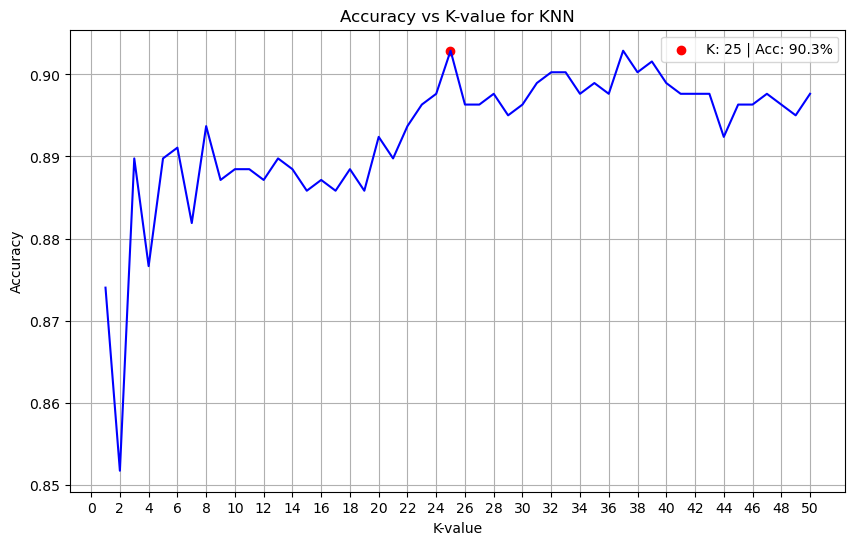

Accuracy: 90.3%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.90      0.85      0.88       308
    Osmancik       0.90      0.94      0.92       454

    accuracy                           0.90       762
   macro avg       0.90      0.90      0.90       762
weighted avg       0.90      0.90      0.90       762

Confusion Matrix
 [[263  45]
 [ 29 425]]


In [3]:
from sklearn.neighbors import KNeighborsClassifier

KNN_k_values = []
KNN_accuracy_values = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())  # Using ravel() to convert to 1D array
    yhat = knn.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    KNN_k_values.append(k)
    KNN_accuracy_values.append(accuracy)

KNN_accuracy_df = pd.DataFrame({'K-value': KNN_k_values, 'Accuracy': KNN_accuracy_values})

# Find index of maximum accuracy
KNN_max_index = KNN_accuracy_df['Accuracy'].idxmax()
KNN_k_max = int(KNN_accuracy_df.loc[KNN_max_index]['K-value'])
KNN_acc_max = KNN_accuracy_df.loc[KNN_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(KNN_accuracy_df['K-value'], KNN_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K-value for KNN')
plt.scatter(KNN_k_max-0.05, KNN_acc_max, color='red', label=f'K: {KNN_k_max:.0f} | Acc: {KNN_acc_max*100:.1f}%')
plt.legend()
plt.xticks(range(0, 51, 2))
plt.grid(True)
plt.show()

# Creating the model using the optimum value for K
KNN_model = KNeighborsClassifier(n_neighbors = KNN_k_max)
KNN_model.fit(X_train, y_train.values.ravel())
KNN_pred = KNN_model.predict(X_test)
KNN_accuracy = accuracy_score(y_test.values.ravel(), KNN_pred)
KNN_cr = classification_report(y_test.values.ravel(), KNN_pred)
KNN_cm = confusion_matrix(y_test.values.ravel(), KNN_pred)

# Printing the metrics
print("Accuracy:", f"{KNN_accuracy * 100:.1f}%\n")
print("Classification Report\n", KNN_cr)
print("Confusion Matrix\n", KNN_cm)

## Decision Tree (DT)

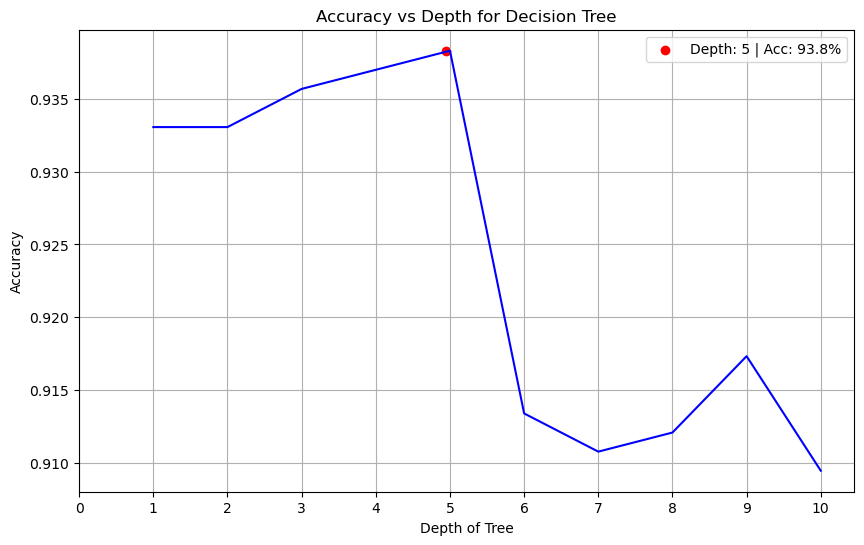

Accuracy: 93.8%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.93      0.92      0.92       308
    Osmancik       0.94      0.95      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.93      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[282  26]
 [ 21 433]]


In [12]:
from sklearn.tree import DecisionTreeClassifier

DT_depth = []
DT_accuracy_values = []

for i in range(1,11):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train, y_train.values.ravel())
    yhat = clf_tree.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    DT_depth.append(i)
    DT_accuracy_values.append(accuracy)

DT_accuracy_df = pd.DataFrame({'Depth': DT_depth, 'Accuracy': DT_accuracy_values})

# Find index of maximum accuracy
DT_max_index = DT_accuracy_df['Accuracy'].idxmax()
DT_depth_max = int(DT_accuracy_df.loc[DT_max_index]['Depth'])
DT_acc_max = DT_accuracy_df.loc[DT_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(DT_accuracy_df['Depth'], DT_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth for Decision Tree')
plt.scatter(DT_depth_max-0.05, DT_acc_max, color='red', label=f'Depth: {DT_depth_max:.0f} | Acc: {DT_acc_max*100:.1f}%')
plt.legend()
plt.xticks(range(0, 11, 1))
plt.grid(True)
plt.show()

# Creating the model using the optimum value for Depth
DT_model = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = DT_depth_max)
DT_model.fit(X_train, y_train.values.ravel())
DT_pred = DT_model.predict(X_test)
DT_accuracy = accuracy_score(y_test.values.ravel(), DT_pred)
DT_cr = classification_report(y_test.values.ravel(), DT_pred)
DT_cm = confusion_matrix(y_test.values.ravel(), DT_pred)

# Printing the metrics
print("Accuracy:", f"{DT_accuracy * 100:.1f}%\n")
print("Classification Report\n", DT_cr)
print("Confusion Matrix\n", DT_cm)

## Random Forest (RF)

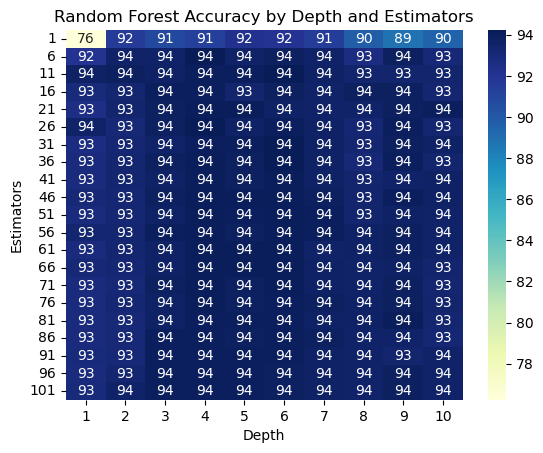

In [39]:
from sklearn.ensemble import RandomForestClassifier

max_depth_values = list(range(1, 11))  # Test max_depth from 1 to 10
n_estimators_values = list(range(1, 102, 5))  # Test n_estimators from 1 to 100 with step size 10

RF_results = []

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        clf_forest = RandomForestClassifier(
            n_estimators=n_estimators, 
            criterion="entropy", 
            random_state=100, 
            max_depth=max_depth
        )
        clf_forest.fit(X_train, y_train.values.ravel())
        yhat = clf_forest.predict(X_test)
        accuracy = accuracy_score(y_test, yhat)
        RF_results.append({'Depth': max_depth, 'Estimators': n_estimators, 'Accuracy': accuracy*100})

RF_accuracy_df = pd.DataFrame(RF_results)

# Find index of maximum accuracy
RF_max_index = RF_accuracy_df['Accuracy'].idxmax()
RF_depth_max = int(RF_accuracy_df.loc[RF_max_index]['Depth'])
RF_estimators_max = int(RF_accuracy_df.loc[RF_max_index]['Estimators'])
RF_acc_max = RF_accuracy_df.loc[RF_max_index]['Accuracy']

# Visualizing the best combination
print("Best combination")
print(RF_accuracy_df.loc[RF_accuracy_df['Accuracy'].idxmax()])

# Visualizing all the combinations
RF_pivot_table = pd.pivot_table(RF_accuracy_df, values='Accuracy', index='Estimators', columns='Depth')
sns.heatmap(RF_pivot_table, cmap='YlGnBu', annot=True)
plt.title('Random Forest Accuracy by Depth and Estimators')
plt.xlabel('Depth')
plt.ylabel('Estimators')
plt.show()

# Creating the model using the optimum value for Depth
RF_model = RandomForestClassifier(n_estimators=RF_estimators_max, criterion="entropy", random_state=100, max_depth=RF_depth_max)
RF_model.fit(X_train, y_train.values.ravel())
RF_pred = RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test.values.ravel(), RF_pred)
RF_cr = classification_report(y_test.values.ravel(), RF_pred)
RF_cm = confusion_matrix(y_test.values.ravel(), RF_pred)

# Printing the metrics
print("Accuracy:", f"{RF_accuracy * 100:.1f}%\n")
print("Classification Report\n", RF_cr)
print("Confusion Matrix\n", RF_cm)